# Empresa DATACLEAN. Limpando seus dados para uma melhor performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## 1.Verificando a integridade básica dos dados

Executaremos uma verificação básica para saber se o dataset contem o que esperamos e examinaremos se há o número correto de amostras.

In [3]:
df = pd.read_excel('/content/drive/MyDrive/DADOS/default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Precisamos verificar se a variável **ID** contém identificadores exlusivos. Logo em seguida, faremos uma comparação se os valores são únicos em relação a dataset completo.

In [4]:
print(df['ID'].nunique())
print(df.shape[0])

29687
30000


Isso significa que o **ID** não é um identificador exclusivo para as linhas de dados.

O próximo comando listará os IDs exclusivos e a frequência com que ocorrem. Executaremos essa operação e armazenaremos as contagens de valores em uma variável.

In [5]:
id_counts = df['ID'].value_counts()
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

### Mascaras booleanas

Entraremos em um conceito um pouco técnico mas que será de alta ajuda para esclarecimentos futuros.

A **Máscara booleana** (Mascara lógica) é uma maneira de filtrar um array, ou série, obedecendo uma condição por meio de **operadores**.

Alguns operadores utilizados na linguagem Python:

|Descrição|Operador|
|---|---|
| "IGUAL A" | == |
|"MAIOR QUE"|>|
|"MENOR QUE"|<|
|"MAIOR OU IGUAL A"|>=|
|"MENOR OU IGUAL A"|<=|
|"DIFERENTE DE"|!=|

A saída é um array com uma série de values True/False, também conhecidos como **valores booleanos**.

O código abaixo tem como função exemplificar como uma condição booleana se comporta dentro do dataset.


In [6]:
np.random.seed(seed=24)

In [7]:
random_integers = np.random.randint(low= 1,
                                    high= 5,
                                    size = 100)

random_integers[:5]

array([3, 4, 1, 4, 2])

In [8]:
is_equal_to_3 = random_integers == 3
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [9]:
sum(is_equal_to_3)

22

In [10]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## 2.Verificação da integridade dos dados

Agora que adiquirimos conhecimento sobre arrays booleanos, examinaremos alguns IDs duplicados que descobrimos. Vericamos que em nosso conjunto de IDs existem apenas duplicações e nada mais que isso. As proximas etapas são relacionadas a remoção de linhas de qualidade duvidosa.

In [11]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [12]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object')

In [13]:
dupe_ids = id_counts.index[dupe_mask]

In [14]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [15]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [16]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analisando melhor o dataset percebemos que cada ID duplicado têm uma linha de dados válidos e outra somente com zeros. Ainda que existam possibilidades de que seja um ponto fora da curva (outliers) não faz o menor sentido já quem não existe ter, por exemplo, idade igual a 0 anos ou limite de credito igual a 0.

**A análise também envolve saber visualizar padrões e ruídos. De todo modo, caso tenha dúvidas a respeito de uma expeculação, é de forma profissional e uma boa prática como Cientista de dados que consulte um Especialista do negócio. Ele responderá melhor o que aconteceu para chegarmos nos possíveis ruídos e razões pela qual o dataset se comporta de maneira duvidosa**.

Uma abordagem para lidar com esses ruídos seria criar uma matriz booleana que percorra todo o nosso dataset, que encontre linhas zeradas a partir da segunda coluna e assim eliminá-lo.

In [17]:
# Eliminando entradas totalmente zeradas
df_zero_mask = df == 0

In [18]:
feature_zero_mask = df_zero_mask.iloc[: , 1:].all(axis=1)

In [19]:
sum(feature_zero_mask)

315

In [20]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy() # limpando o dataframe

In [21]:
df_clean_1.shape

(29685, 25)

In [22]:
df_clean_1['ID'].nunique()

29685

Podemos ver que eliminamos com sucesso as duplicatas, já que o número de IDs exclusivos é igual ao número de linhas.

Agora estamos prontos para começar a examinar os dados propriamente ditos: as características e a resposta.

## 3.Explorando e limpando os dados

Vamos dar uma olhada nas informações de nosso dataset.

In [23]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

As informações mostradas acima são basicamente o número de registros não nulos (o que as vezes pode estar mascarado de outras formas descobertas logo adiante) e os tipos de dados que estão armazenados em cada registro.

O que queremos agora é analizar os possíveis valores contidos em cada registro de cada coluna.

In [24]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [25]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

A saída anterior revela a presença de dois valores não documentados, 0 e  -2, e também a razão do atributo 'PAY_1' conter um valor do tipo *object* que são dados alfanuméricos em vez de *int64* que são dados númericos.

Há uma string *'not available'* presente na coluna, simbolizando dados ausentes.
Vamos tratar dela simplismente removendo do nosso conjunto de dados.

In [26]:
# Usando uma mascara lógica para retirar dados ausentes ('Not available')
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

Somando o número de registros que não tenha dados ausentes.

In [27]:
sum(valid_pay_1_mask)

26664

Criando um novo dataframe sem dados ausentes.

In [28]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
df_clean_2.shape

(26664, 25)

Verificando novamente os grupos contidos no atributo 'PAY_1'

In [29]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

Para finalizarmos essa sessão, vamos converter o tipo de dado genérico do atributo que é '*object*' para '*int64*'. 

Vamos vizualizar as informações do atributo recem alterado.

In [30]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## 4.Explorando o limite de crédito e as características demográficas

Nesta sessão, começaremos nossa exploração dos dados com o limite de crédito e as características etárias. Vamos visualiza-los e obter síteses estatísticas para verificar se os dados contidos nessas características são aceitáveis. 

Em seguida, examinaremos as **características categóricas** de instrução e estado civil para ver se os valores fazem sentido e os corrigiremos caso exista alguma inconstancia. 

Por fim, daremos atenção aos atributos que compõe **características numéricas**, fazendo uma plotagem do tipo Histograma e fazer comparações com base em linhas temporais.

In [31]:
mlp.rcParams['figure.dpi'] = 150 #figuras em alta resolução

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc16638a30>,
      dtype=object)

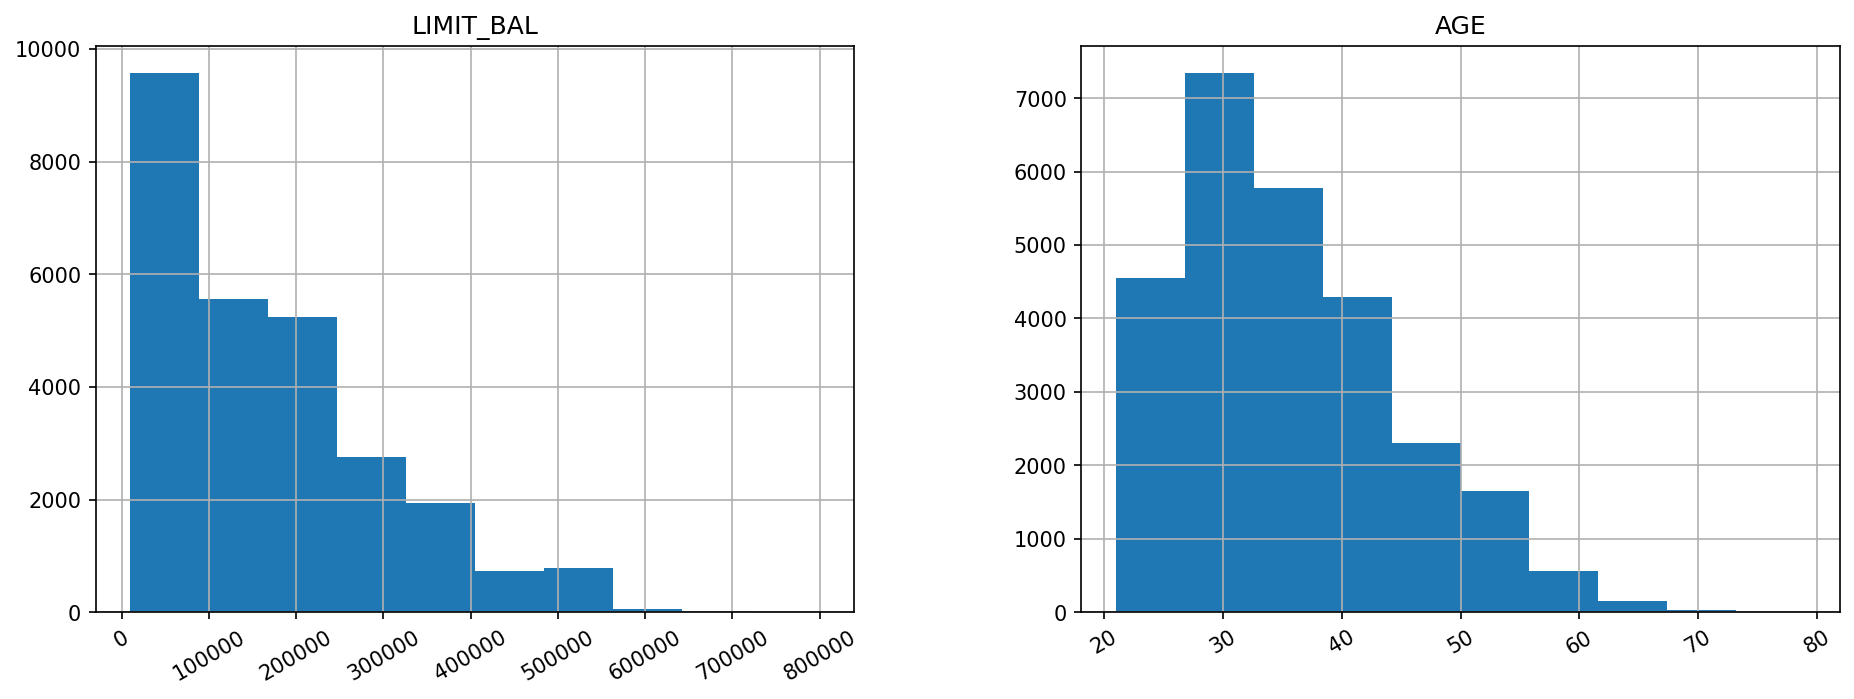

In [32]:
mlp.rcParams['font.size'] = 10
mlp.rcParams['figure.figsize'] = [15, 5]
df_clean_2[['LIMIT_BAL', 'AGE']].hist(xrot= 30)

Esse é um bom snapshot visual para os atributos **LIMIT_BAL** e **AGE**. Podemos obter uma rápida visualização aproximada de todos os dados dessa forma.

Vamos dar uma olhada em algumas síteses estatísticas, como a média e a mediana.

In [33]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Com base nos histogramas e nas convenientes estatísticas calculadas, que inclui uma contagem de não nulos, a média e o desvio-padrão, o valor mínino, máximo e os quartis, conseguimos chegar em algumas conclusões:

> Limite mínimo de crédito igual a 10.000 novos dólares taiwanses.
> Idade aprensenta estar bem distribuida, com ninguém com idade abaixo de 21 anos que tenha uma conta de crédito.

**Atenção: O dataset compõe dados sobre pessoas de Taiwan; sua unidade montária são os "novos dólares taiwanses"**.

Para as características categóricas, seria interessante verificar as contagens de valores, já que há poucos valores exclusivos.

In [34]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Alguns graus de instrução não foram documentados (0, 5 e 6), mas como eles não são predominantes e o Sócio da empresa nos deu a permição, vamos agrupa-los na categoria 4 (outros).

In [35]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],
                                value= 4,
                                inplace= True)

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Vamos olhar para a atributo **MARRIAGE**:

In [36]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Como o valor 0 não foi documentado no dicionário de dados, vamos agrupar na categoria "outros".

In [37]:
df_clean_2['MARRIAGE'].replace(to_replace= 0,
                               value= 3,
                               inplace= True)

df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

### Aprofundamento nas características categóricas

Text(0.5, 0, 'Education level: ordinal encoding')

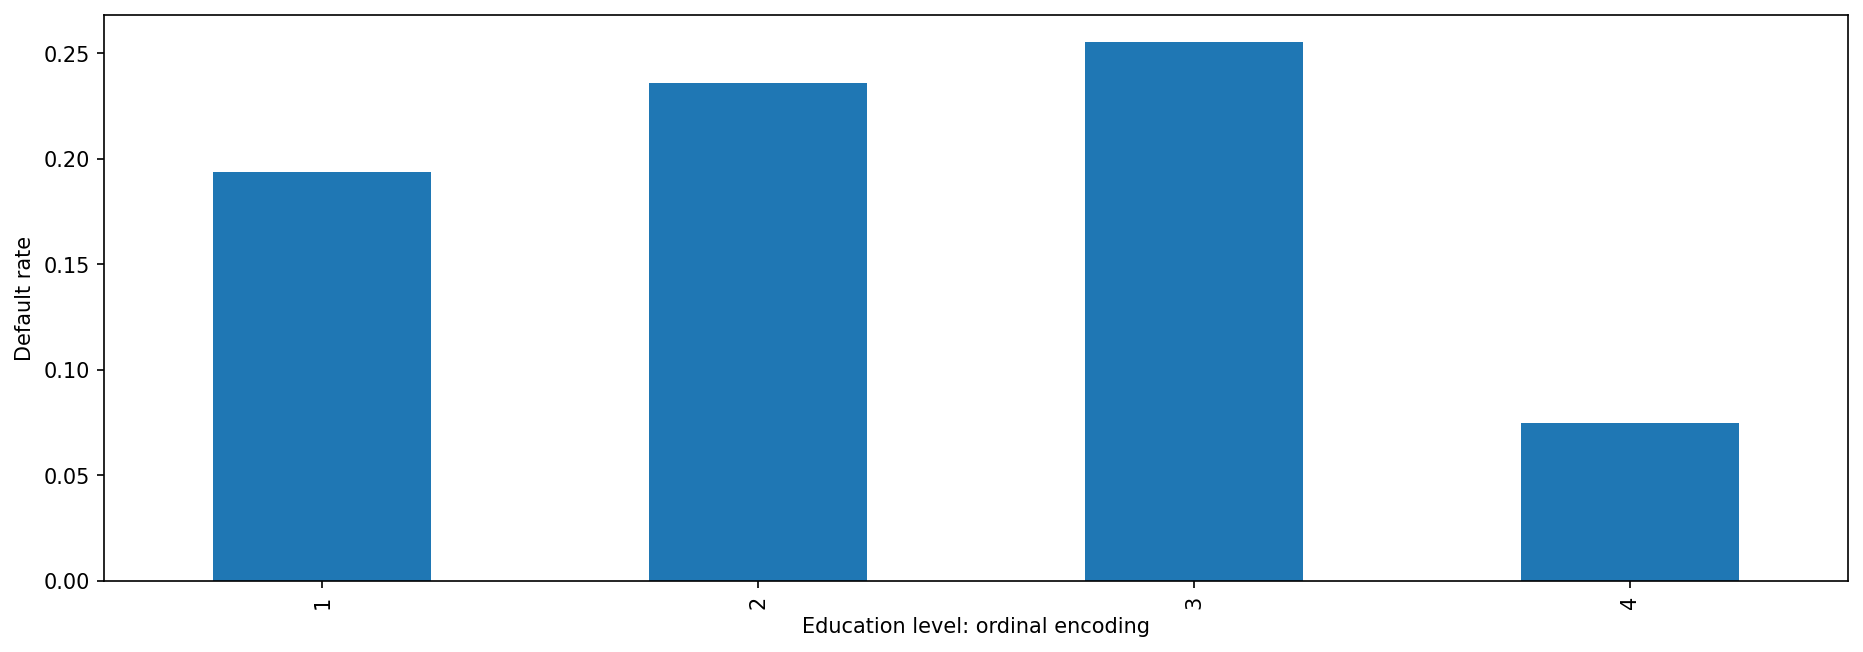

In [38]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend= False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

O Histograma acima não nos mostra muitas informações que podemos usar em nosso favor. Para isso vamos ter usar um método de codificação de variáveis categóricas chamada **codificação one-hot (OHE, one-hot encoding)**.

## 5.Implementando a OHE (one-hot encoding) para uma característica categórica

O objetivo será criar uma "engenharia reversa" no atributo **EDUCATION** para obter os rótulos de texto que representam os diferentes graus de intrução.

Vamos consultar o nosso dicionário de dados e criar um novo atributo ao lado do atributo **EDUCATION**.

PASSO 1: criar um atributo vazio.

In [39]:
df_clean_2['EDUCATION_CAT'] = 'none'

PASSO 2: examinar os primeiros registros dos atributos "EDUCATION" e "EDUCATION_CAT".

In [40]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


PASSO 3: Preencher o atributo "EDUCATION_CAT" com as strings apropriadas. Para que o código reconheça cada string em seu determinado grupo, vamos mapear o atributo e relacionar sua categoria ao valor do dicionário.

In [41]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [42]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


PASSO 5: criando um dataframe de codificação one-hot do atributo "EDUCATION_CAT"

In [43]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Em todas as colunas, qualquer linha específica terá um numero 1 coluna e zeros nas outras. Em uma linha específica, a coluna com 1 deve corresponder ao nível da variável categórica original.

In [44]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis= 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 
             'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


### Explorando as características de histórico financeiro do dataset

O histórico financeiro se encaixa nos seguintes grupos: o status dos pagamentos mensais nos últimos seis meses e as quantias cobradas e pagas no mesmo período.

Primero vamos imprimir nosso dataset e logo depois relacionar o status de pagamento em uma lista.

In [46]:
df = pd.read_csv('/content/drive/MyDrive/DADOS/dados_limpos_usuarios_de_credito_DATACLEAN.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [47]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [48]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Pela descrição que o método *'describe'* nos mostra, (i) o intervalo de valores é o mesmo para todas as características e (ii) o valor máximo para o atraso de pagamentos é de oito meses.

Vamos examinar as contagens de valores de 'PAY_1' mas que estejam ordenados de acordo com o índice.

In [49]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

Essas informações mostram que boa parte dos usuário de crédito se concentram entre as categorias -2, -1 e 0; o que não é de todo mal já que se consultarmos nosso dicionário de dados veremos que correspondem entre **não usada, totalmente paga** ou **pelo menos o pagamento mínimo feito**.

Examinaremos com detalhes em um gráfico e consideraremos se ele é tão informativo quanto deveria.

In [51]:
pay_1_bins = np.array(range(-2, 10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

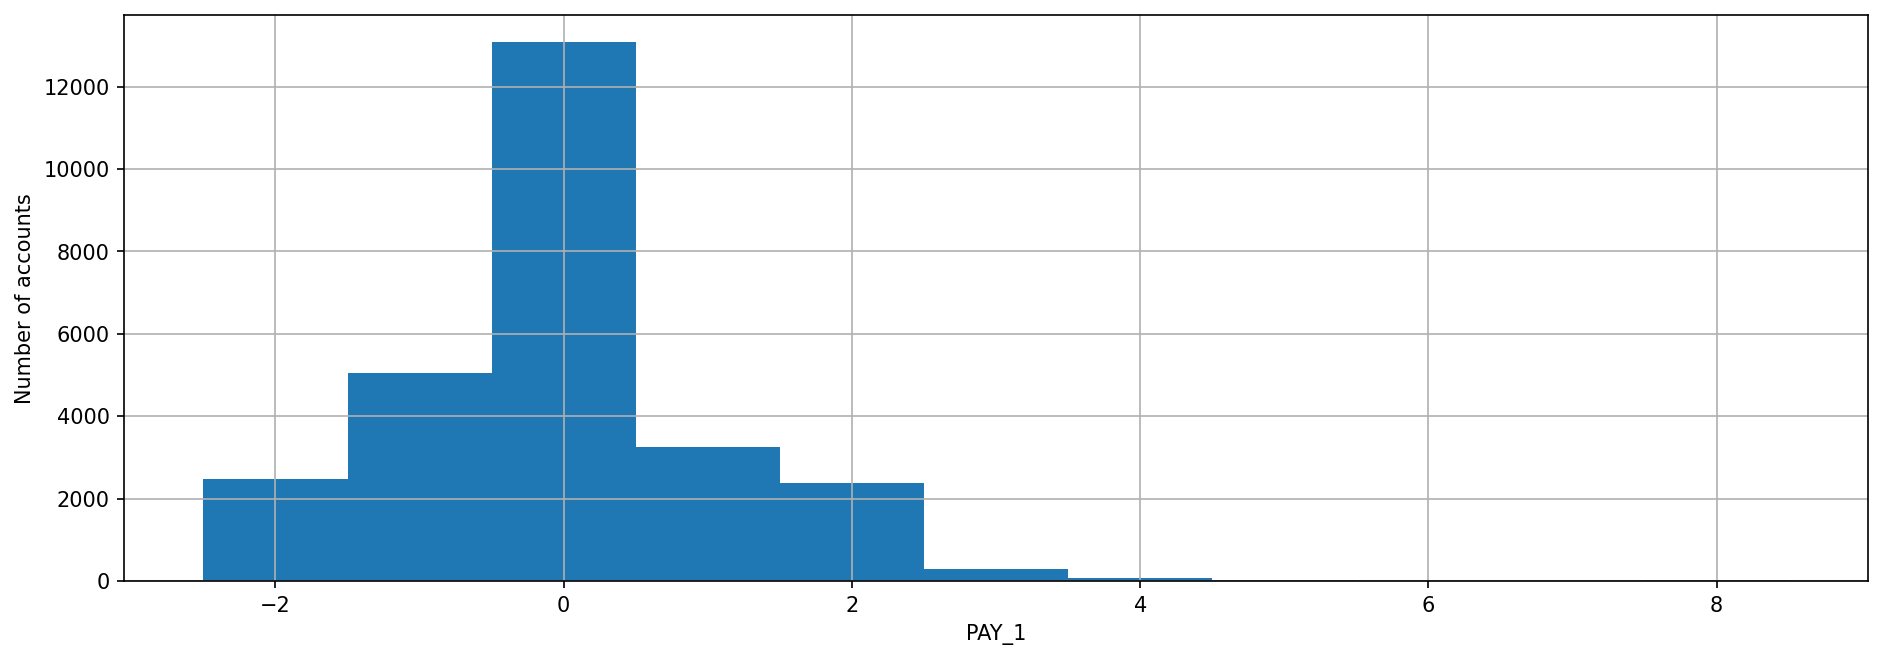

In [52]:
df[pay_feats[0]].hist(bins= pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

A visualização do nosso gráfico confirma que a maioria das contas se encontram em boa situação (entre -2, -1 e 0). Mas vimos no comando *value_counts* que há registros com atrasos de 5, 6, 7 e até 8 meses, qual o motivo de não aparecem no histograma? A resposta é muito simples: **ELAS ESTÃO NO HISTOGRAMA. Apenas uma pequena parcela do nosso dataset compõe de registros com mais de 5 meses atrasados, o que os tornam praticamente imperceptíveis para visualização. O resultado é uma curva assimétrica para direita, ou seja, a média é maior que a mediana.**

Examinar a distribuição das característcas e verificar se ela parece razoável é algo bom para se confirmar com o cliente, já que a qualidade dos dados é o nosso ponto chave para a criação de modelos preditivos.

E que tal construírmos subplotagens dos meses de pagamentos para fins de comparação? Para isso, vamos passar alguns parâmetros de formatos de layout e tamanhos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc18b8cc70>,
      dtype=object)

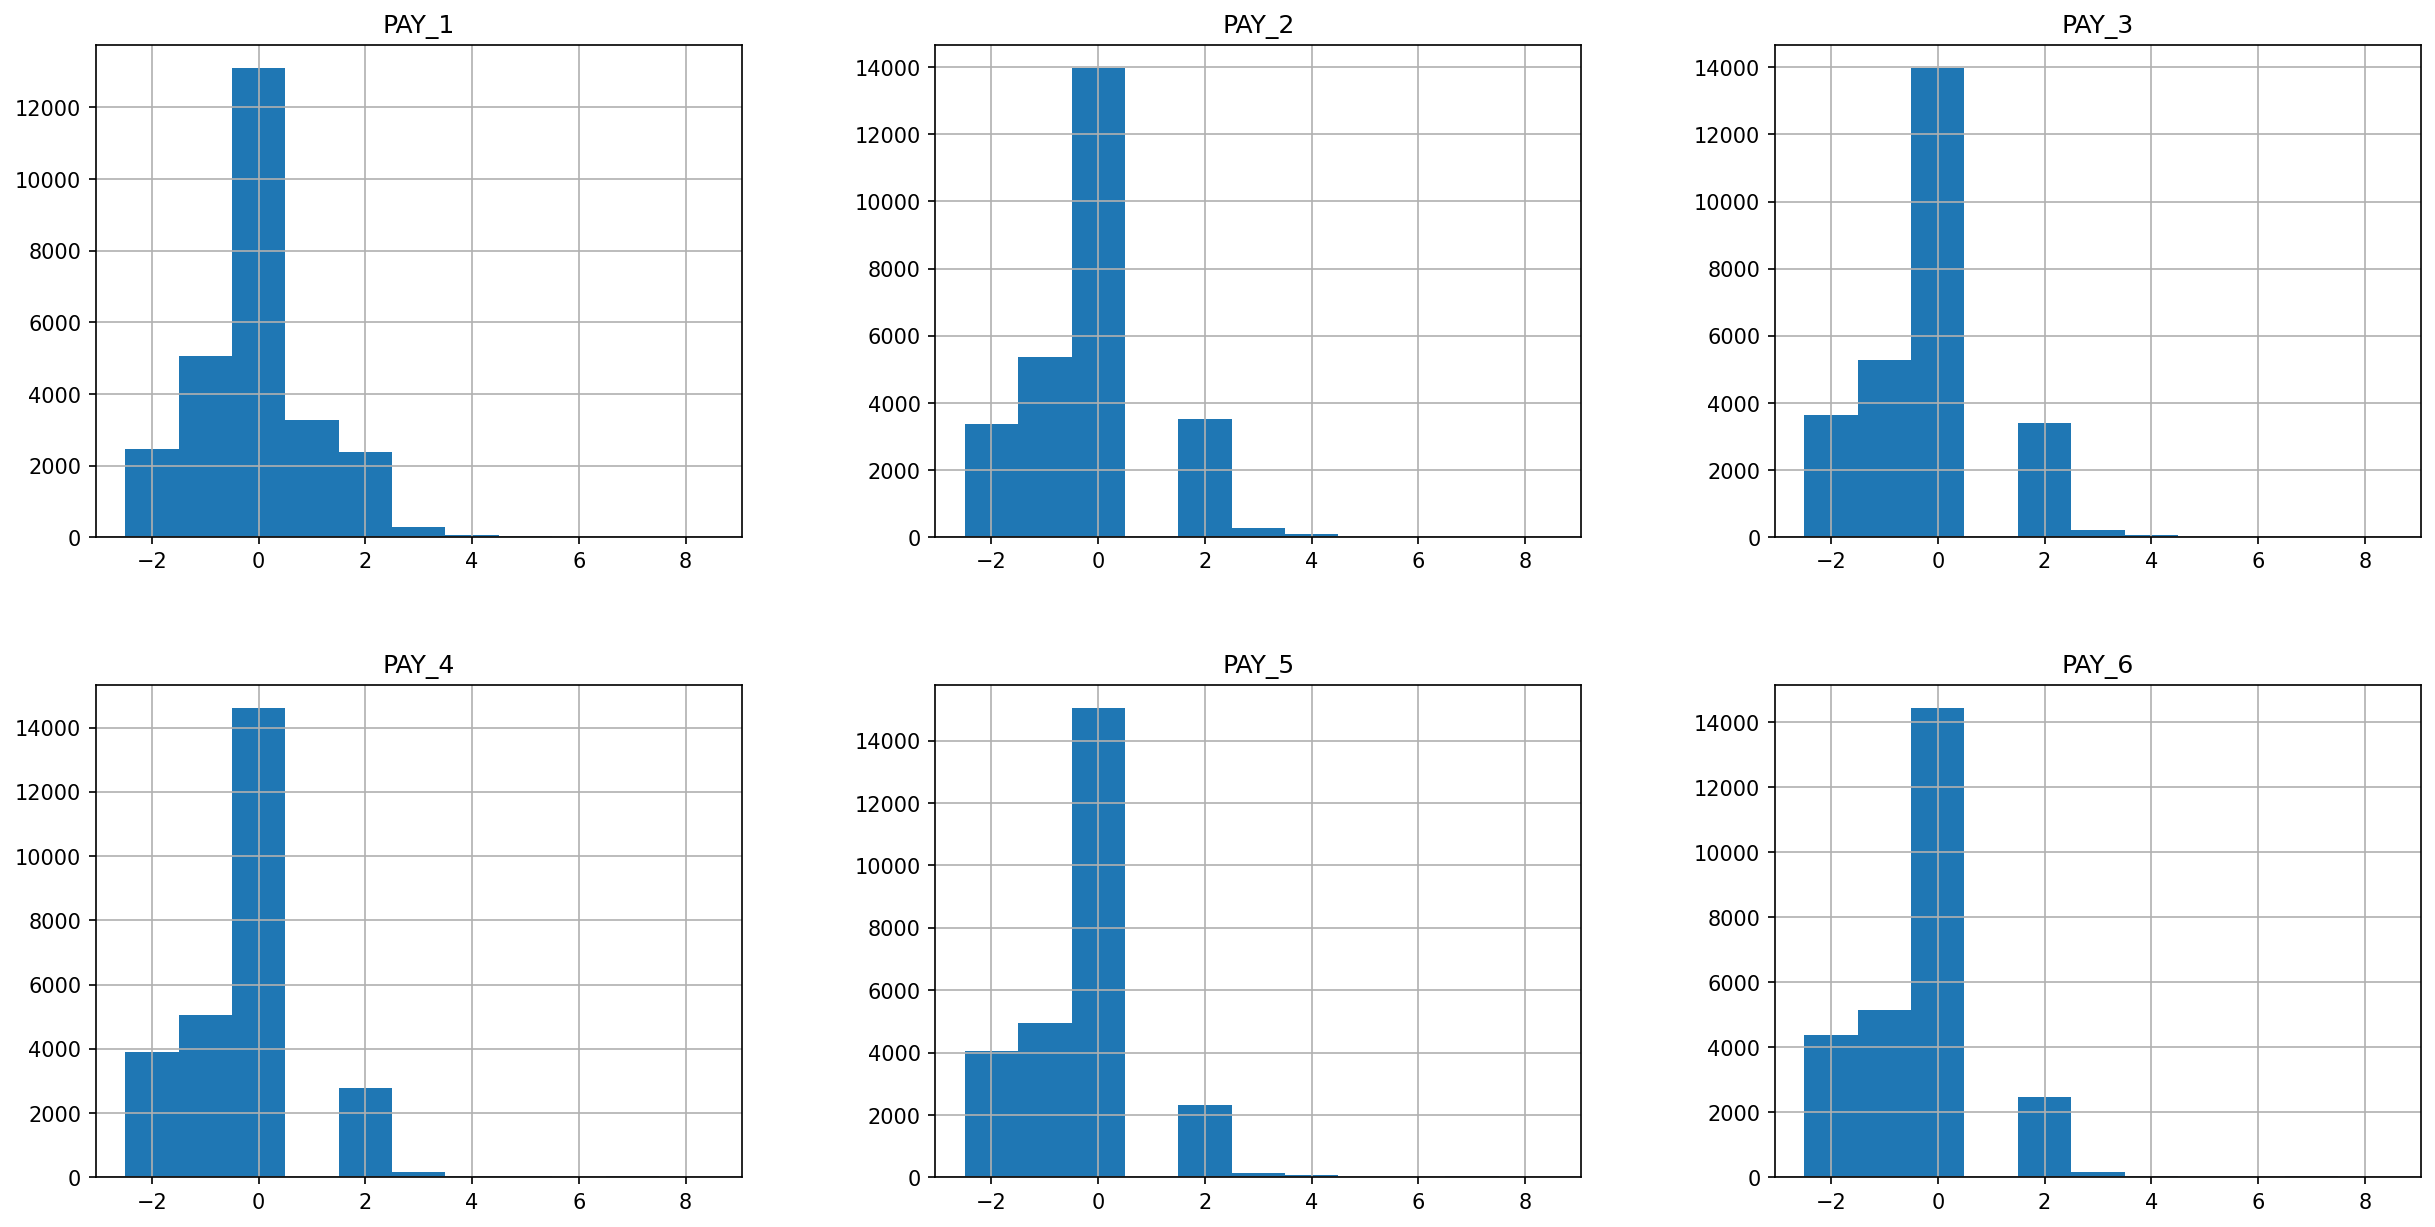

In [53]:
mlp.rcParams['font.size'] = 10
mlp.rcParams['figure.figsize'] = [20, 10]
df[pay_feats].hist(bins= pay_1_bins,
                   layout= (2,3))

Com uma visualização simples podemos achar mais algumas inconsistencias em nossos dados. Vamos falar agora sobre os meses de julho ('PAY_3') e agosto ('PAY_2'). Em julho, poucas contas tiveram atraso de 1 mês no pagamento; mostrado como imperceptível no histograma. No entanto, no mês de agosto, repentinamente há milhares de contas com atraso de 2 meses no pagamento. O que isso realmente quer dizer? E é aqui que a lógica de négocios e boas práticas como cientista de dados entram: **o número de contas com atraso de dois meses em agosto deveria ser menor que o do mês anterior, ou seja, menor que o mês de julho**.

Examinaremos com mais detalhes as contas com atraso de 2 meses em agosto e veremos qual foi o status de pagamento em julho. Utilizaremos uma máscara booleana para capturarmos somente os atributos que nos convem no momento:

In [54]:
# EXAMINANDO STATUS DE PAGAMENTO DE JULHO (PAY_3)
df.loc[df['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


A única maneira de chegarmos a um atraso de 2 meses em agosto seria se haver um atraso de 1 mês em julho, mas nenhuma dessas contas indicam isso.

**Caso não encontre uma solução para uma aberração como esta, terá de encontrar a lógica para criar um dataset ou entrar em contato com o responsavel que o forneceu.**

** Suponhamos que o cliente informou que está tendo problemas para obter dados do último mês, o que tem gerado relatórios imprecisos para contas que têm atraso de 1 mês no pagamento. Foi relatado também que nos meses de julho e agosto as contas foram subnotificadas com valor 1.

Isso nos dá algumas ideias: somente as características do atributo (PAY_1) podem ser consideradas como representativo para dados futuros, ou seja, que serão utilizados como base para criação de modelos preditivos. *Um modelo preditivo depende da obtenção do mesmo tipo de dado para fazer as previsões para as quais foi treinado.*

Explicaremos ao cliente que **não podemos usar os atributos mais antigos, já que eles não são representativos dos dados futuros no qual o modelo preditivo irá se basear. Solicitaremos educadamente que nos informem sobre qualquer problema adicional nos dados do qual tenham conhecimento.**